1501.6840999014676 ms


<function matplotlib.pyplot.show(close=None, block=None)>

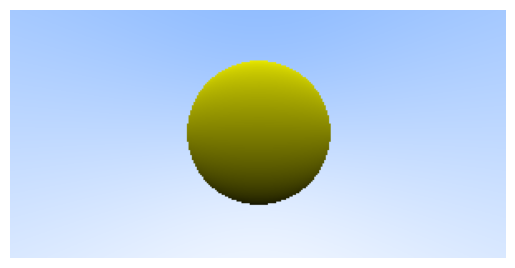

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Common scene parameters
nx, ny = 300, 150
aspect_ratio = nx / ny
fov = np.pi / 3.0
lower_left = np.array([-2.0, -1.0, -1.0])
horizontal = np.array([4.0, 0.0, 0.0])
vertical = np.array([0.0, 2.0, 0.0])
origin = np.array([0.0, 0.0, 0.0])
sphere_center = np.array([0.0, 0.0, -1.0])
sphere_radius = 0.5

def ray_color(ro, rd):
    # ray-sphere intersection
    oc = ro - sphere_center
    a = np.dot(rd, rd)
    b = np.dot(oc, rd)
    c = np.dot(oc, oc) - sphere_radius**2
    disc = b*b - a*c
    if disc > 0:
        t = (-b - np.sqrt(disc)) / a
        if t > 0.001:
            hit = ro + t*rd
            normal = (hit - sphere_center) / np.linalg.norm(hit - sphere_center)
            base = np.array([1.0, 1.0, 0.0])
            intensity = 0.5 * (normal[1] + 1.0)
            return intensity * base
    # sky
    udir = rd / np.linalg.norm(rd)
    t = 0.5 * (udir[1] + 1.0)
    return (1-t)*np.array([1.0,1.0,1.0]) + t*np.array([0.5,0.7,1.0])

def render_sequential():
    image = np.zeros((ny, nx, 3), dtype=np.float32)
    for j in range(ny):
        for i in range(nx):
            u = i / nx
            v = j / ny
            dir = lower_left + u*horizontal + v*vertical - origin
            dir = dir / np.linalg.norm(dir)
            image[ny-1-j, i] = ray_color(origin, dir)
    return image

times = {}
start = time.perf_counter()
seq_img = render_sequential()
exec_time = (time.perf_counter() - start) * 1000  # ms
print(exec_time, "ms")
plt.imshow(seq_img)
plt.axis('off')
plt.show